# Collection items in Aboriginal and Torres Strait Islander languages

The data for this notebook is available on the [Queensland Government Open Data Portal](https://www.data.qld.gov.au/dataset/slq-atsi-language-materials).

### Get Data

In [35]:
# The following cell is based on Using_Jupyter_notebooks exercises by @wragge
# Import external package
import requests

# Base URL for requests 
url = 'https://www.data.qld.gov.au/api/3/action/datastore_search?resource_id=c06a87dd-452a-4d5b-ba9c-d63d5bb04879&limit=1000'

# Query the API
response = requests.get(url)

# Extract the results as JSON
results = response.json()

In [36]:
# Refine data received from query
records = results['result']['records']

In [37]:
# Query the total number of records
print('Total number of records:'+str(len(records)))

Total number of records:605


In [38]:
# Compile list of titles 
i = 0
titles = []
print('*** Titles ***\n')
while i < len(records):
    title = records[i]['Title']
    titles.append(title)
    print(title)
    i += 1

*** Titles ***

Aboriginal words and their meanings
A brief description of the Kalkatungu language
This is what happened
Yanyuwa country
Emu dreaming story from Tyethe (Jessie Gap) plus CDEP/NAIDOC-Aboriginal rodeo
A grammar of Yankunytjatjara
Abraham
South Australian Speical Aboriginal Schools Workshop for Preschool Teachers and Aides, Indulkana, S.A., October 1974
Aboriginal pedagogy
Warka irititja munu kuwari kutu
A learner's guide to Kaytetye
Dictionary of the Butchulla language
Wullunnu-wunia Mark nunya
Innamincka words
Stories of Obed Raggett
Gurre Kamilaroi, or, Kamilaroi sayings
Grammatik der sprache von Murray Island
Ganydjarr Djesuwa
Jesus anyunmangung pu tuka mudgu awaning = The sermon on the Mount; translated by Heather Hinch
Jisas stori.
Ta Jesus annyunmangung pu la iyamangung pu, jurra 1.
Chichich nul kar pam pork yat raak cheruchalemak
Jesusnthurr pam minchthaaw wiiythkun yomparrnanirr
Lingu maln'thurruna
Two representative tribes of Queensland
Djesuy gana dhawu lakarana

## Wordcloud of AUSTLANG Languages

In [39]:
# Compile list of AUSTLANG Languages 
import re 

i = 0
AUSTLANG_languages = ""
while i < len(records):
    AUSTLANG_languages += ' '+records[i]['AUSTLANG language']
    i += 1

#remove language code suffixes and punctuation
AUSTLANG_languages = re.sub('language|[0-9]|/|;','', AUSTLANG_languages)
AUSTLANG_languages = re.sub(' [A-Z] ',' ', AUSTLANG_languages)

In [40]:
# Wordcloud sources:
# https://www.geeksforgeeks.org/generating-word-cloud-python
# https://www.datacamp.com/community/tutorials/wordcloud-python

#Import Wordcloud dependencies 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from PIL import Image

stopwords = set(STOPWORDS) 

mask = np.array(Image.open('flag.png'))

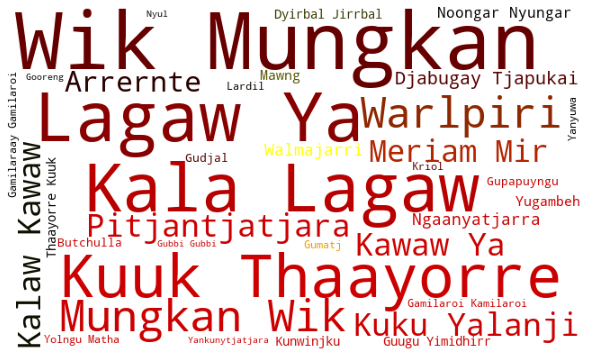

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords,
                mode="RGBA",
                background_color="white",
                mask=mask,
                min_font_size = 10).generate(AUSTLANG_languages) 
    
# plot the WordCloud image 
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Wordcloud of AUSTLANG Codes

In [42]:
# Compile list of AUSTLANG Codes

i = 0
AUSTLANG_codes = ""
while i < len(records):
    AUSTLANG_codes += ' '+records[i]['AUSTLANG code']
    i += 1    

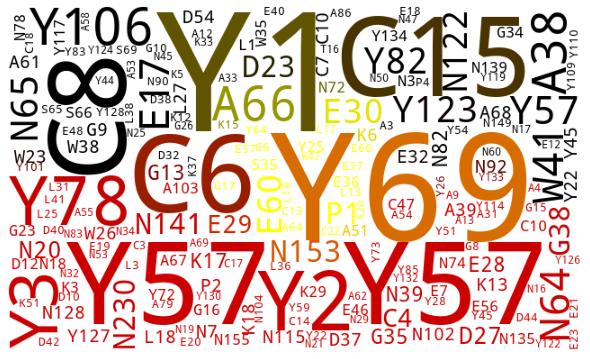

In [43]:
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords,
                mode="RGBA",
                background_color="white",
                mask=mask,
                min_font_size = 10).generate(AUSTLANG_codes) 
    
# plot the WordCloud image 
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 